In [40]:
#pip install plotnine
#!pip install datatable
!pip install dplython

     -------------------------------------- 715.7/715.7 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dplython: filename=dplython-0.0.7-py3-none-any.whl size=747227 sha256=4de7bf59e355b0a98586c2638822494c77a97b6279360a031cb47aeb3972a8fc
  Stored in directory: c:\users\soumi\appdata\local\pip\cache\wheels\47\4f\07\8c2ca2c87030eebcb13c46ad3fabf2a54953b3a3d42e2ac9c8
Successfully built dplython


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from plotnine import *
from plotnine.data import mpg

os.chdir("F:/Docs/Data Science/Projects")

colors = ["#CC1011", "#665555", "#05a399", "#cfcaca", "#f5e840", "#0683c9", "#e075b0"]

apr_data = pd.read_csv("F:/Docs/Data Science/Projects/uber-raw-data-apr14.csv")
may_data = pd.read_csv("F:/Docs/Data Science/Projects/uber-raw-data-may14.csv")
jun_data = pd.read_csv("F:/Docs/Data Science/Projects/uber-raw-data-jun14.csv")
jul_data = pd.read_csv("F:/Docs/Data Science/Projects/uber-raw-data-jul14.csv")
aug_data = pd.read_csv("F:/Docs/Data Science/Projects/uber-raw-data-aug14.csv")
sep_data = pd.read_csv("F:/Docs/Data Science/Projects/uber-raw-data-sep14.csv")

data_2014 = pd.concat([apr_data,may_data, jun_data, jul_data, aug_data, sep_data])

data_2014['Date/Time'] = pd.to_datetime(data_2014['Date/Time'], format = "%m/%d/%Y %H:%M:%S", errors='coerce')

data_2014['Time'] = data_2014['Date/Time'].dt.strftime("%H:%M:%S")

data_2014['day'] = pd.Categorical(data_2014['Date/Time'].dt.day)
data_2014['month'] = pd.Categorical(data_2014['Date/Time'].dt.month_name())
data_2014['year'] = pd.Categorical(data_2014['Date/Time'].dt.year)
data_2014['dayofweek'] = pd.Categorical(data_2014['Date/Time'].dt.day_name())

data_2014['hour'] = pd.Categorical(data_2014['Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').hour))
data_2014['minute'] = pd.Categorical(data_2014['Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').minute))
data_2014['second'] = pd.Categorical(data_2014['Time'].apply(lambda x: datetime.strptime(x, '%H:%M:%S').second))


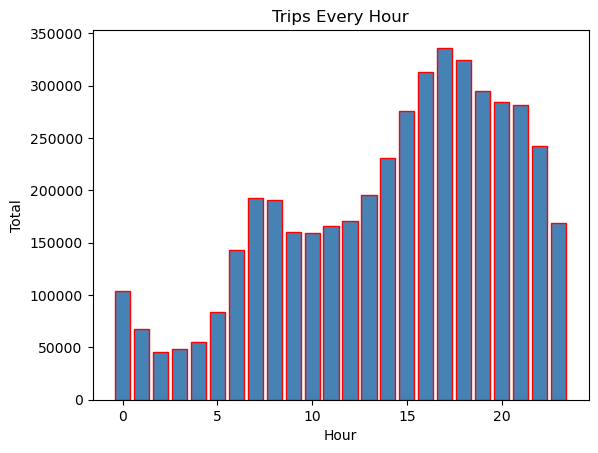

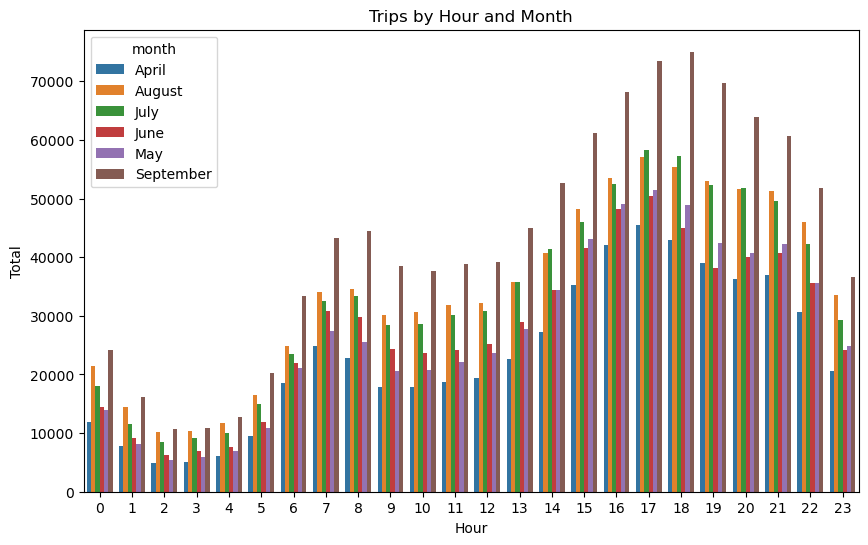

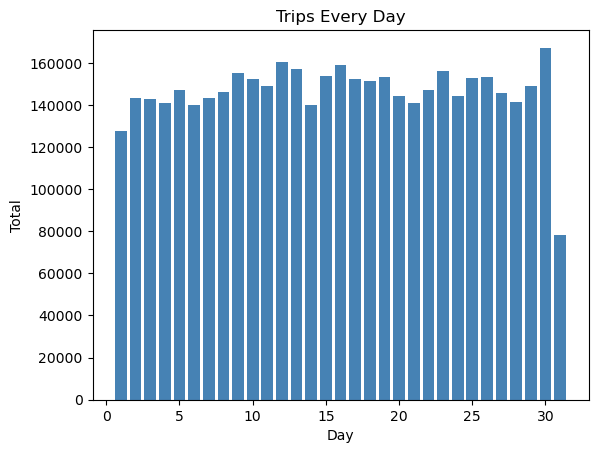

In [5]:
hour_data = data_2014.groupby('hour').size().reset_index(name='Total')
hour_data

plt.bar(hour_data['hour'], hour_data['Total'], color='steelblue', edgecolor='red')
plt.title('Trips Every Hour')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.show()

month_hour = data_2014.groupby(['month', 'hour']).size().reset_index(name='Total')

plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='Total', hue='month', data=month_hour)
plt.title('Trips by Hour and Month')
plt.xlabel('Hour')
plt.ylabel('Total')
plt.show()

day_group = data_2014.groupby('day').size().reset_index(name='Total')
day_group

plt.bar(day_group['day'], day_group['Total'], color='steelblue')
plt.title('Trips Every Day')
plt.xlabel('Day')
plt.ylabel('Total')
plt.show()

In [27]:
data_2014.head()

,Date/Time,Lat,Lon,Base,Time,day,month,year,dayofweek,hour,minute,second
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,1,April,2014,Tuesday,0,11,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,1,April,2014,Tuesday,0,17,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,1,April,2014,Tuesday,0,21,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,1,April,2014,Tuesday,0,28,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,1,April,2014,Tuesday,0,33,0


   | month        Total
   | str32        int64
-- + ---------  -------
 0 | April       564516
 1 | August      829275
 2 | July        796121
 3 | June        663844
 4 | May         652435
 5 | September  1028136
[6 rows x 2 columns]



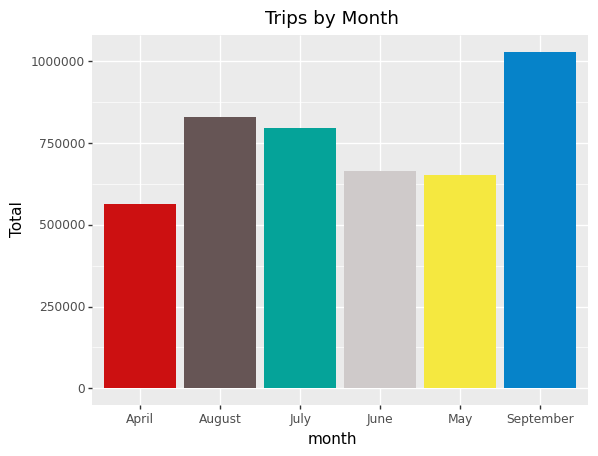

<ggplot: (169518979789)>

In [53]:
import pandas as pd
from plotnine import *
import datatable
import babel
from babel.numbers import format_decimal

#data_2014 = pd.read_csv('data_2014')

day_month_group = data_2014.groupby(['month', 'day']).size().reset_index(name='Total')
day_month_group.head()
ggplot(day_month_group, aes('day', 'Total', fill='month')) \
    + geom_bar(stat='identity') \
    + ggtitle('Trips by Day and Month') \
    + scale_y_continuous(labels=lambda x: format_decimal(x, locale='en_US', decimal_quantization=1)) \
    + scale_fill_manual(values=colors)

month_group = data_2014.groupby(['month']).size().reset_index(name='Total')

dt_month_group = datatable.Frame(month_group)

print(dt_month_group)
(
    ggplot(dt_month_group)
    + aes('month', 'Total', fill='month')
    + geom_bar(stat='identity')
    + ggtitle('Trips by Month')
    + theme(legend_position='none')
    + scale_fill_manual(values=colors)

)




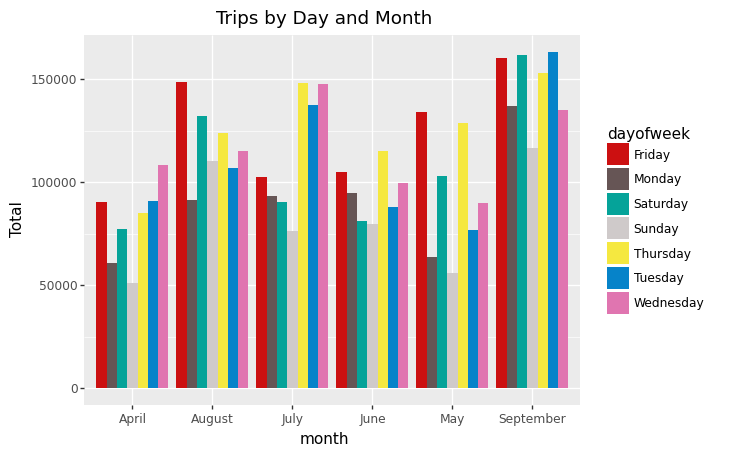

<ggplot: (169517312503)>

In [36]:

month_weekday = data_2014.groupby(['month', 'dayofweek']).size().reset_index(name='Total')
(
    ggplot(month_weekday, aes('month', 'Total', fill='dayofweek')) 
    + geom_bar(stat='identity', position='dodge')
    + ggtitle('Trips by Day and Month')
    + scale_fill_manual(values=colors)
)



C:\Users\soumi\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\soumi\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\soumi\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\soumi\anaconda3\lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\soumi\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
C:\Users\soumi\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.


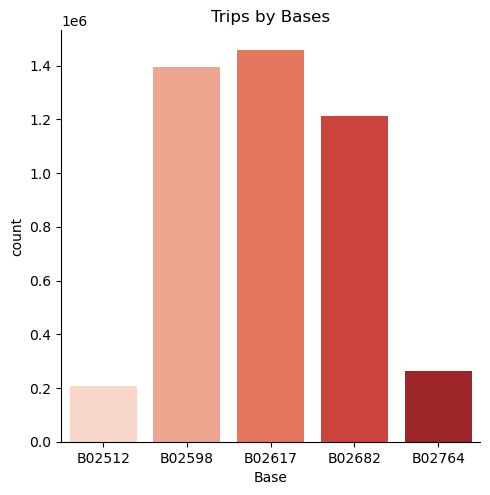

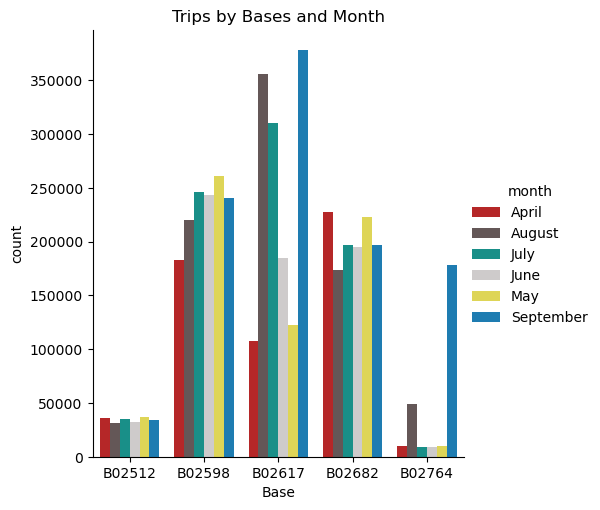

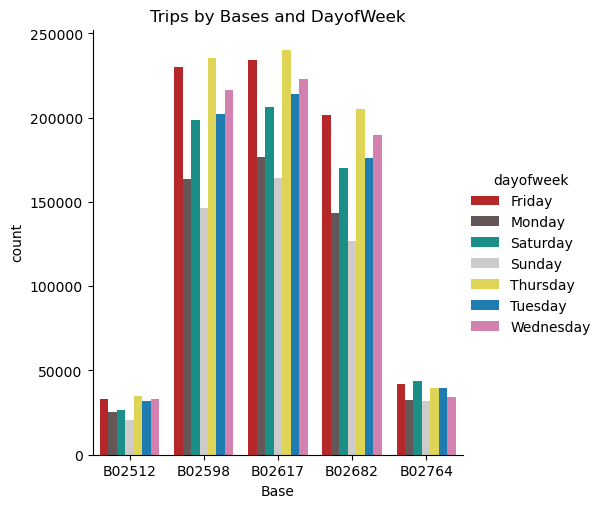

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for scale_y_continuous and scale_fill_manual
from matplotlib.ticker import FuncFormatter

# for group_by and summarize
import dplython

# For datatable
from IPython.display import display, HTML

#['Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu', 'Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']
# ggplot: Trips by Bases
ggplot = sns.catplot(x='Base', kind='count', data=data_2014, palette='Reds')
ggplot.set(title='Trips by Bases')
#ggplot.set_yticklabels(formatter=FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# ggplot: Trips by Bases and Month
ggplot = sns.catplot(x='Base', hue='month', kind='count', data=data_2014, palette=colors, dodge=True)
ggplot.set(title='Trips by Bases and Month')
#ggplot.set_yticklabels(formatter=FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# ggplot: Trips by Bases and DayofWeek
ggplot = sns.catplot(x='Base', hue='dayofweek', kind='count', data=data_2014, palette=colors, dodge=True)
ggplot.set(title='Trips by Bases and DayofWeek')
#ggplot.set_yticklabels(formatter=FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

In [58]:
# group_by and summarize
day_and_hour = (data_2014.groupby(['day', 'hour'])
                .agg(Total=('hour', 'count'))
                .reset_index())

# datatable
day_and_hour.head()
#display(HTML(day_and_hour.to_html()))

,day,hour,Total
0,1,0,3247
1,1,1,1982
2,1,2,1284
3,1,3,1331
4,1,4,1458


Text(0.5, 1.0, 'Heat Map by Hour and Day')

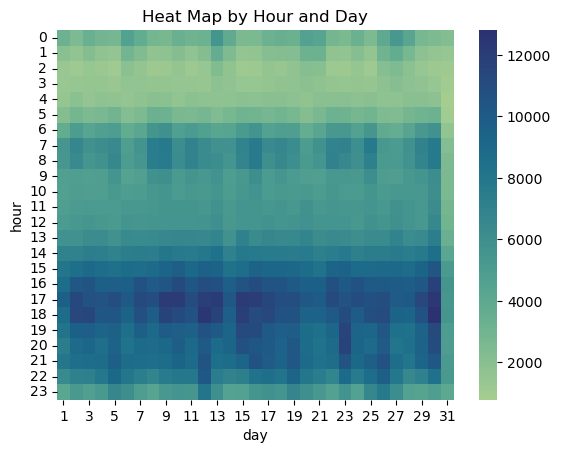

In [60]:
# Heat Map by Hour and Day
sns.heatmap(data=day_and_hour.pivot('hour', 'day', 'Total'), cmap='crest')
plt.title('Heat Map by Hour and Day')

Text(0.5, 1.0, 'Heat Map by Month and Day')

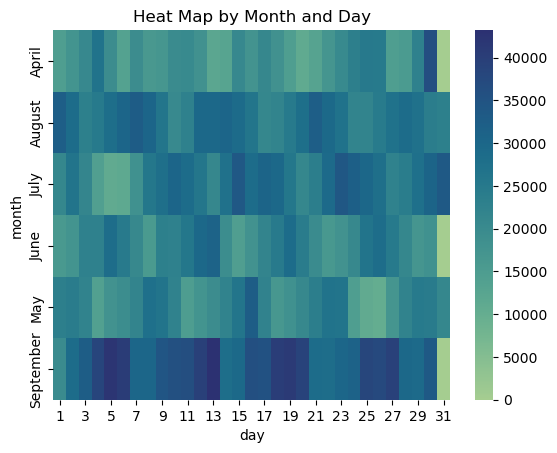

In [61]:
# Heat Map by Month and Day
sns.heatmap(data=day_month_group.pivot('month', 'day', 'Total'), cmap='crest')
plt.title('Heat Map by Month and Day')

Text(0.5, 1.0, 'Heat Map by Month and Day of Week')

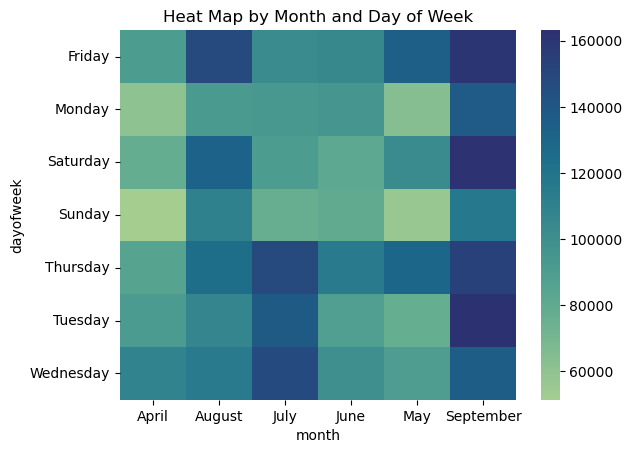

In [62]:
# Heat Map by Month and Day of Week
sns.heatmap(data=month_weekday.pivot('dayofweek', 'month', 'Total'), cmap='crest')
plt.title('Heat Map by Month and Day of Week')

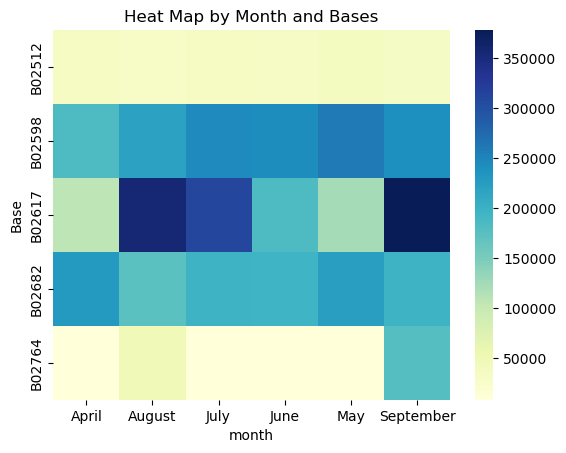

In [64]:
# Group by base and month
month_base = data_2014.groupby(['Base', 'month']).size().reset_index(name='Total')

# Group by base and dayofweek
dayofweek_bases = data_2014.groupby(['Base', 'dayofweek']).size().reset_index(name='Total')

# Plot heat map by month and bases
plt.figure()
sns.heatmap(month_base.pivot(index='Base', columns='month', values='Total'), cmap="YlGnBu")
plt.title("Heat Map by Month and Bases")
plt.show()

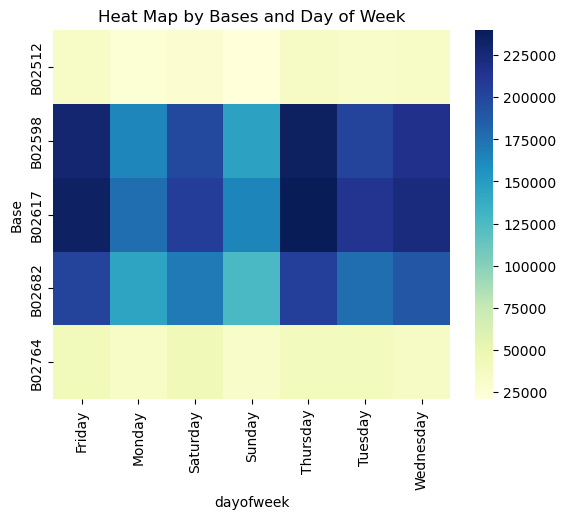

In [65]:
# Plot heat map by bases and day of week
plt.figure()
sns.heatmap(dayofweek_bases.pivot(index='Base', columns='dayofweek', values='Total'), cmap="YlGnBu")
plt.title("Heat Map by Bases and Day of Week")
plt.show()

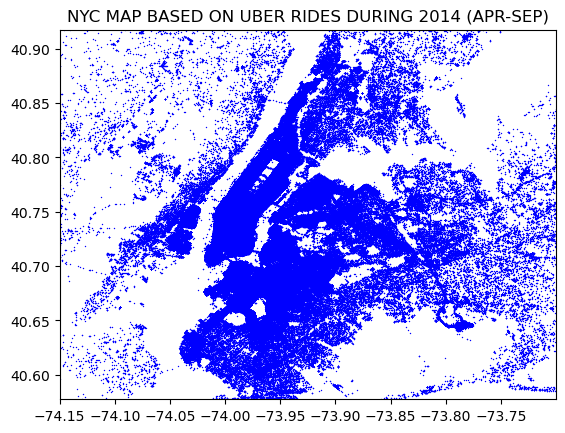

In [104]:
# Set min and max latitude and longitude values
min_lat = 40.5774
max_lat = 40.9176
min_long = -74.15
max_long = -73.7004

# Plot NYC map based on Uber rides during 2014 (Apr-Sep)
#colors = ['Blue','Red','Green','Cyan','Magenta','Yellow','Black','White']
plt.figure()
plt.scatter(data_2014['Lon'], data_2014['Lat'], s=1, color='Blue', linewidth= 0.001)
plt.xlim(min_long, max_long)
plt.ylim(min_lat, max_lat)
plt.title("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP)")
plt.show()
plt.legend()

C:\Users\soumi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


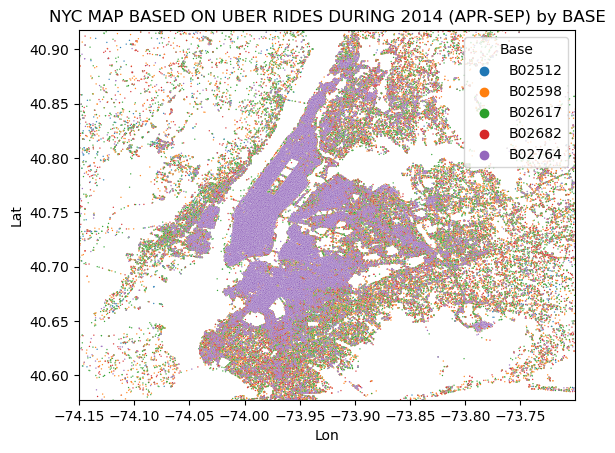

In [108]:
# Plot NYC map based on Uber rides during 2014 (Apr-Sep) by base
plt.figure()
sns.scatterplot(x='Lon', y='Lat', hue='Base', data=data_2014, s=1)
plt.xlim(min_long, max_long)
plt.ylim(min_lat, max_lat)
plt.title("NYC MAP BASED ON UBER RIDES DURING 2014 (APR-SEP) by BASE")
plt.show()

In [106]:
# Print session info
print(pd.__version__)

1.4.4
